# Feature importance of XGBClassifier
Calculated the permutation importance using sklearn's `permutation_importance` function


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# load data
feature_imp = pd.read_csv('./outputs/feature_importance/all_feature_importance_df.csv')

In [3]:
feature_imp.head()

,Unnamed: 0,feature,importance,model,day_split,seed,lookback_days,lookforward_days_freezing,lookforward_days_predict
0,50,humidity_max,0.028125,weather_patient_passive,0.7,0,5,2,3
1,10,tree_pollen_mean,0.015625,weather_patient_passive,0.7,0,5,2,3
2,43,temperature_min_min,0.014063,weather_patient_passive,0.7,0,5,2,3
3,34,temperature_max_max,0.014063,weather_patient_passive,0.7,0,5,2,3
4,46,temperature_min_skew,0.013672,weather_patient_passive,0.7,0,5,2,3


In [4]:
feature_imp[['lookback_days', 'lookforward_days_freezing', 'lookforward_days_predict']].drop_duplicates()

,lookback_days,lookforward_days_freezing,lookforward_days_predict
0,5,2,3
228,5,2,4
456,5,2,5
684,7,2,3
912,7,2,4
1140,7,2,5
1368,14,2,3
1596,14,2,4
1824,14,2,5
2052,21,2,3


In the optimal model (lookback_days=7, lookforward_days_freezing=2, lookforward_days_predict=3), the top features are:

In [28]:
# lookback_days = 7, lookforward_days_freezing = 2, lookforward_days_predict = 3

feature_imp_main = feature_imp[(feature_imp['lookback_days'] == 7) & 
                               (feature_imp['lookforward_days_freezing'] == 2) & 
                               (feature_imp['lookforward_days_predict'] == 3)]

In [29]:
threshold_of_interest = 0.3

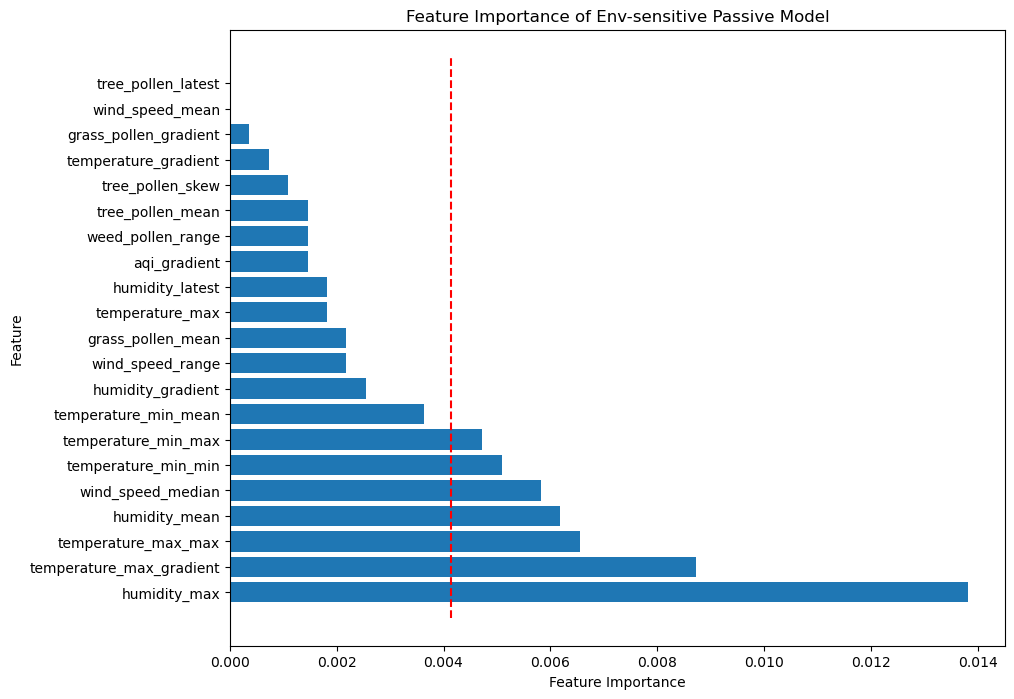

In [ ]:
# env-sensitive passive
feature_imp_main_weather_passive = feature_imp_main[
    (feature_imp_main['model'] == 'weather_patient_passive') &
    (feature_imp_main['importance'] > 0)]

# plot
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_main_weather_passive['feature'], feature_imp_main_weather_passive['importance'])
plt.vlines(threshold_of_interest*max(feature_imp_main_weather_passive['importance']), -1, len(feature_imp_main_weather_passive['feature']), colors='r', linestyles='dashed')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Env-sensitive Passive Model')

# save
plt.savefig('./outputs/feature_importance/feature_importance_env_sensitive_passive.svg', dpi=300, bbox_inches='tight')

plt.show()


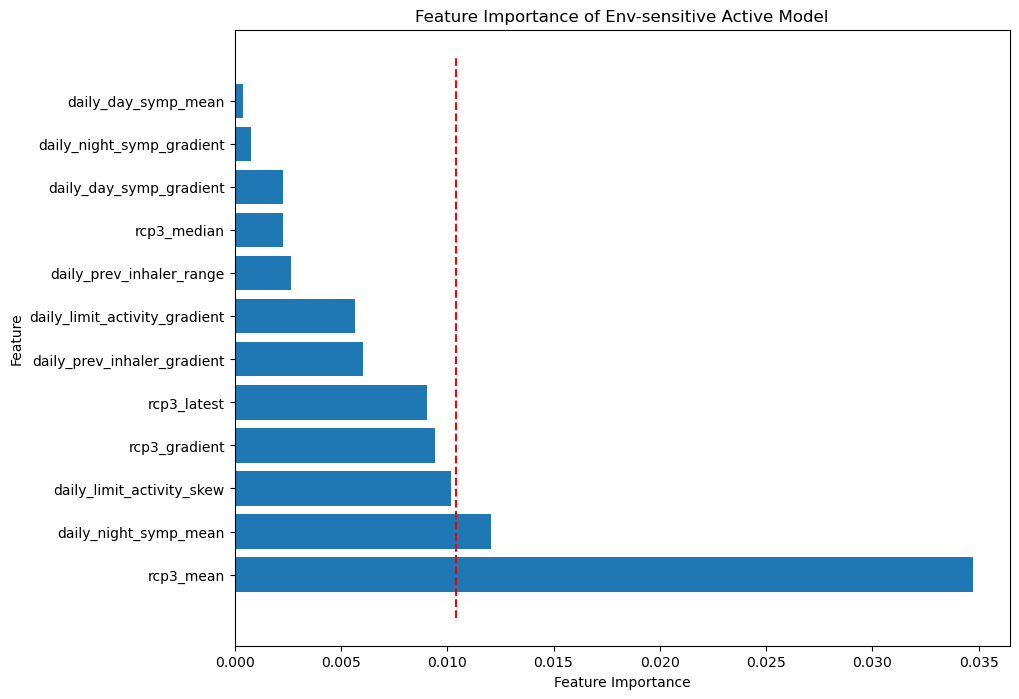

In [ ]:
# env-sensitive active
feature_imp_main_weather_active = feature_imp_main[
    (feature_imp_main['model'] == 'weather_patient_active') &
    (feature_imp_main['importance'] > 0)]

# plot
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_main_weather_active['feature'], feature_imp_main_weather_active['importance'])
plt.vlines(threshold_of_interest*max(feature_imp_main_weather_active['importance']), -1, len(feature_imp_main_weather_active['feature']), colors='r', linestyles='dashed')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Env-sensitive Active Model')

# save
plt.savefig('./outputs/feature_importance/feature_importance_env_sensitive_active.svg', dpi=300, bbox_inches='tight')

plt.show()


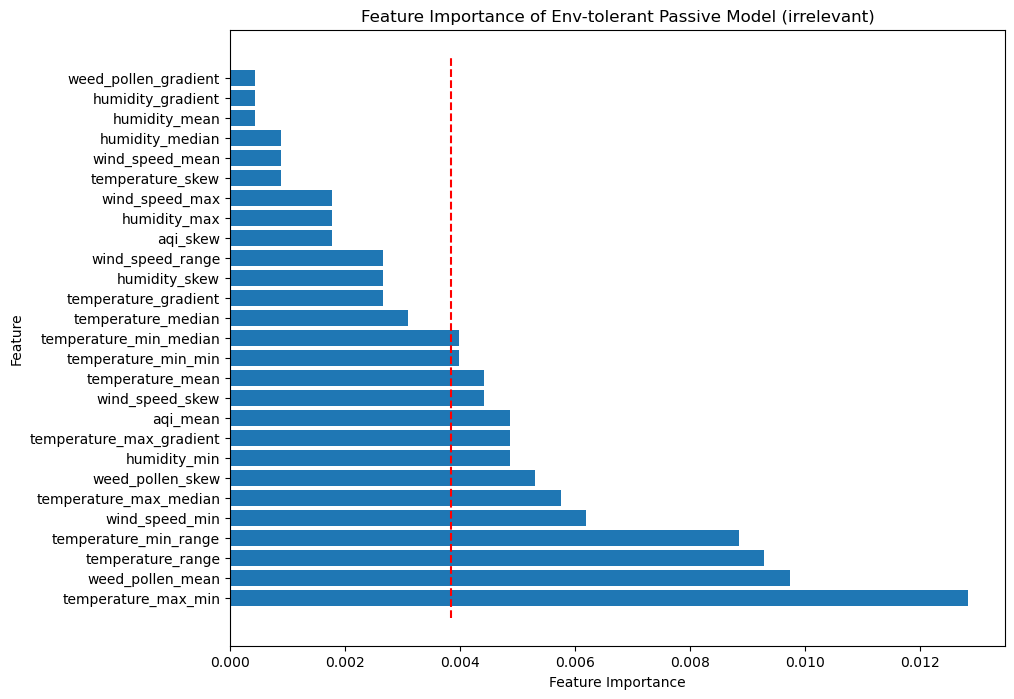

In [ ]:
# # env-tolerant passive (irrelevant)
# feature_imp_main_nonweather_passive = feature_imp_main[
#     (feature_imp_main['model'] == 'nonweather_patient_passive') &
#     (feature_imp_main['importance'] > 0)]

# # plot
# plt.figure(figsize=(10, 8))
# plt.barh(feature_imp_main_nonweather_passive['feature'], feature_imp_main_nonweather_passive['importance'])
# plt.vlines(threshold_of_interest*max(feature_imp_main_nonweather_passive['importance']), -1, len(feature_imp_main_nonweather_passive['feature']), colors='r', linestyles='dashed')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance of Env-tolerant Passive Model (irrelevant)')

# # save
# plt.savefig('./outputs/feature_importance/feature_importance_env_tolerant_passive.svg', dpi=300, bbox_inches='tight')

# plt.show()


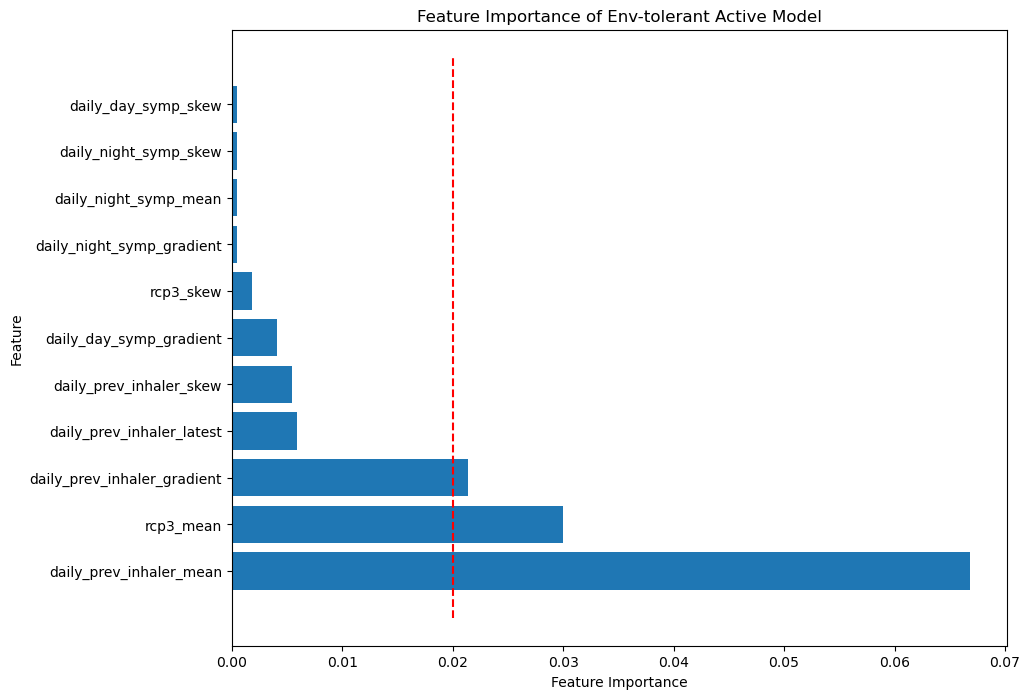

In [ ]:
# env-tolerant active
feature_imp_main_nonweather_active = feature_imp_main[
    (feature_imp_main['model'] == 'nonweather_patient_active') &
    (feature_imp_main['importance'] > 0)]

# plot
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_main_nonweather_active['feature'], feature_imp_main_nonweather_active['importance'])
plt.vlines(threshold_of_interest*max(feature_imp_main_nonweather_active['importance']), -1, len(feature_imp_main_nonweather_active['feature']), colors='r', linestyles='dashed')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Env-tolerant Active Model')

# save
plt.savefig('./outputs/feature_importance/feature_importance_env_tolerant_active.svg', dpi=300, bbox_inches='tight')

plt.show()

## Boxplot across all parameters
The following boxplots show the distribution of feature importance across all hyperparameter combinations for each model type

/var/folders/2r/7y6kxtx51tv23cgtn3tpnclh0000gn/T/ipykernel_28993/1614011672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_imp_weather_passive['importance'] = feature_imp_weather_passive.groupby(
/var/folders/2r/7y6kxtx51tv23cgtn3tpnclh0000gn/T/ipykernel_28993/1614011672.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_imp_weather_passive['feature'] = pd.Categorical(feature_imp_weather_passive['feature'], categories=feature_order, ordered=True)


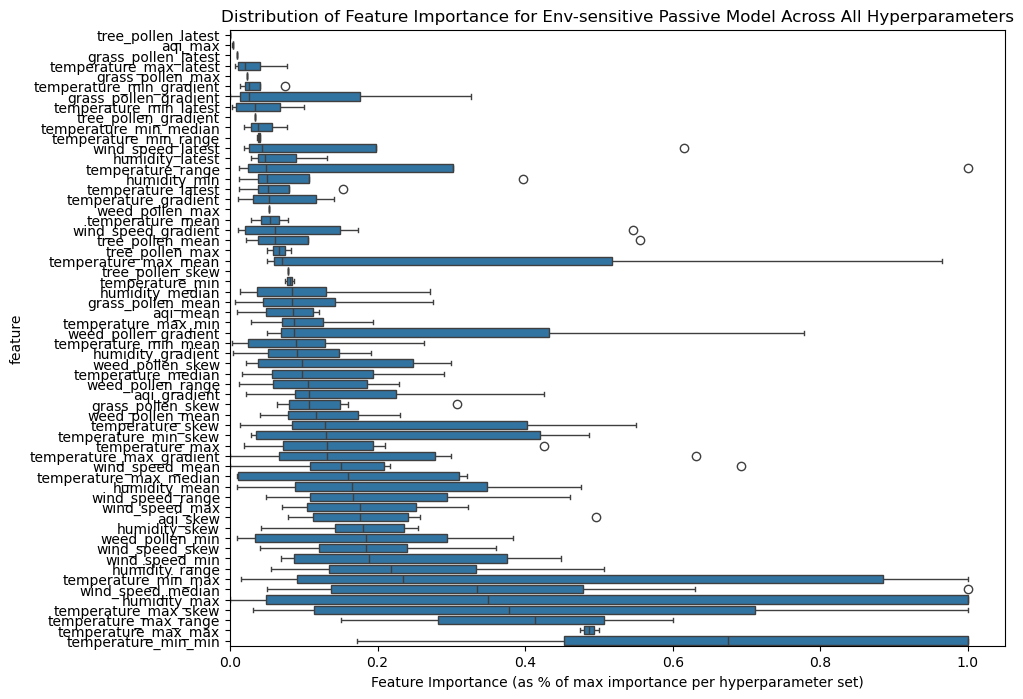

In [ ]:
# env-sensitive passive
feature_imp_weather_passive = feature_imp[
    (feature_imp['model'] == 'weather_patient_passive') &
    (feature_imp['importance'] > 0)]

# as percentage of max importance per hyperparameter combination
feature_imp_weather_passive['importance'] = feature_imp_weather_passive.groupby(
    ['lookback_days', 'lookforward_days_freezing', 'lookforward_days_predict', 'model']
)['importance'].transform(lambda x: x / x.max())

# sort features by median importance
feature_order = feature_imp_weather_passive.groupby('feature')['importance'].median().sort_values(ascending=True).index
feature_imp_weather_passive['feature'] = pd.Categorical(feature_imp_weather_passive['feature'], categories=feature_order, ordered=True)

plt.figure(figsize=(10, 8))
sns.boxplot(x='importance', y='feature', data=feature_imp_weather_passive)
plt.xlim(0, None)
plt.title('Distribution of Feature Importance for Env-sensitive Passive Model Across All Hyperparameters')
plt.xlabel('Feature Importance (as % of max importance per hyperparameter set)')

# save
plt.savefig('./outputs/feature_importance/feature_importance_distribution_env_sensitive_passive.svg', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/2r/7y6kxtx51tv23cgtn3tpnclh0000gn/T/ipykernel_28993/1220709560.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_imp_weather_active['importance'] = feature_imp_weather_active.groupby(
/var/folders/2r/7y6kxtx51tv23cgtn3tpnclh0000gn/T/ipykernel_28993/1220709560.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_imp_weather_active['feature'] = pd.Categorical(feature_imp_weather_active['feature'], categories=feature_order, ordered=True)


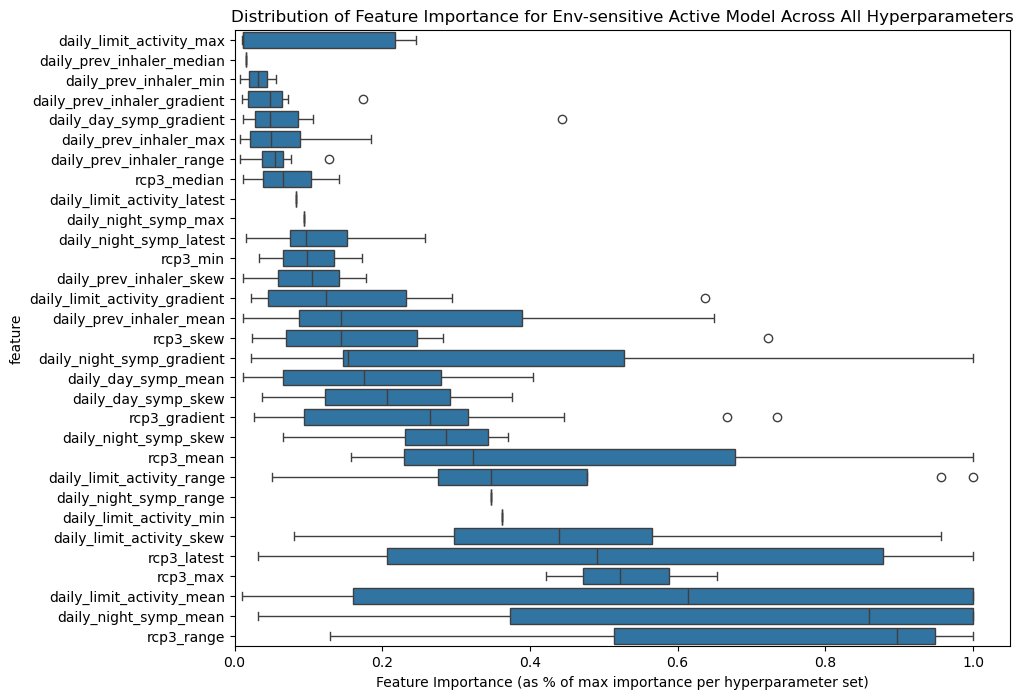

In [ ]:
# env-sensitive active
feature_imp_weather_active = feature_imp[
    (feature_imp['model'] == 'weather_patient_active') &
    (feature_imp['importance'] > 0)]

# as percentage of max importance per hyperparameter combination
feature_imp_weather_active['importance'] = feature_imp_weather_active.groupby(
    ['lookback_days', 'lookforward_days_freezing', 'lookforward_days_predict', 'model']
)['importance'].transform(lambda x: x / x.max())

# sort features by median importance
feature_order = feature_imp_weather_active.groupby('feature')['importance'].median().sort_values(ascending=True).index
feature_imp_weather_active['feature'] = pd.Categorical(feature_imp_weather_active['feature'], categories=feature_order, ordered=True)

plt.figure(figsize=(10, 8))
sns.boxplot(x='importance', y='feature', data=feature_imp_weather_active)
plt.xlim(0, None)
plt.title('Distribution of Feature Importance for Env-sensitive Active Model Across All Hyperparameters')
plt.xlabel('Feature Importance (as % of max importance per hyperparameter set)')

# save
plt.savefig('./outputs/feature_importance/feature_importance_distribution_env_sensitive_active.svg', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/2r/7y6kxtx51tv23cgtn3tpnclh0000gn/T/ipykernel_28993/1511931820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_imp_nonweather_active['importance'] = feature_imp_nonweather_active.groupby(
/var/folders/2r/7y6kxtx51tv23cgtn3tpnclh0000gn/T/ipykernel_28993/1511931820.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_imp_nonweather_active['feature'] = pd.Categorical(feature_imp_nonweather_active['feature'], categories=feature_order, ordered=True)


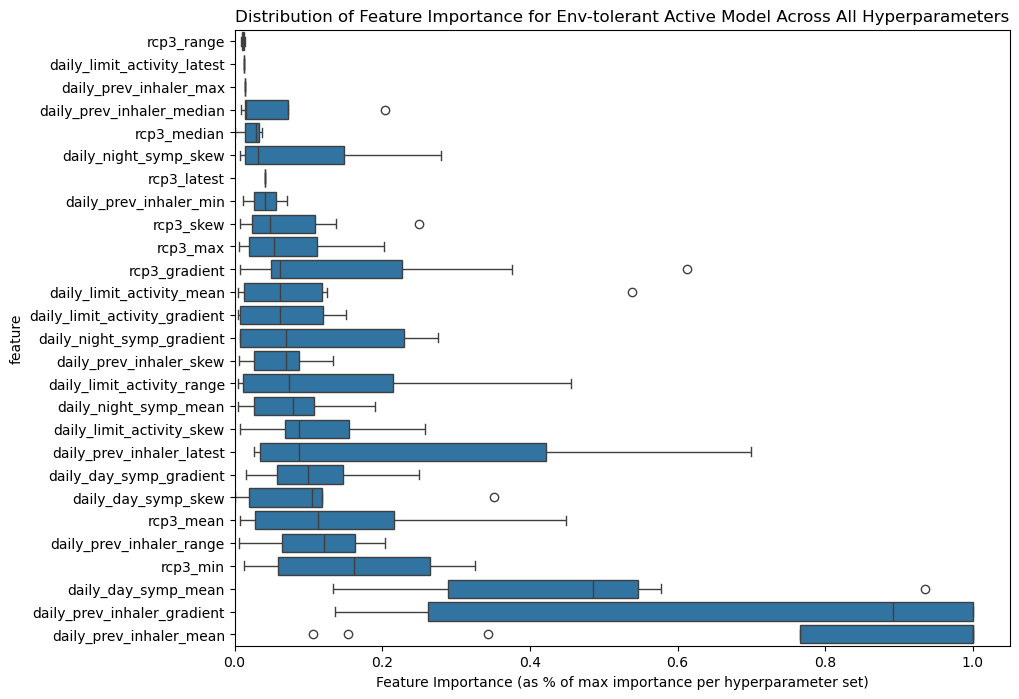

In [ ]:
# env-tolerant active
feature_imp_nonweather_active = feature_imp[
    (feature_imp['model'] == 'nonweather_patient_active') &
    (feature_imp['importance'] > 0)]

# as percentage of max importance per hyperparameter combination
feature_imp_nonweather_active['importance'] = feature_imp_nonweather_active.groupby(
    ['lookback_days', 'lookforward_days_freezing', 'lookforward_days_predict', 'model']
)['importance'].transform(lambda x: x / x.max())

# sort features by median importance
feature_order = feature_imp_nonweather_active.groupby('feature')['importance'].median().sort_values(ascending=True).index
feature_imp_nonweather_active['feature'] = pd.Categorical(feature_imp_nonweather_active['feature'], categories=feature_order, ordered=True)

plt.figure(figsize=(10, 8))
sns.boxplot(x='importance', y='feature', data=feature_imp_nonweather_active)
plt.xlim(0, None)
plt.title('Distribution of Feature Importance for Env-tolerant Active Model Across All Hyperparameters')
plt.xlabel('Feature Importance (as % of max importance per hyperparameter set)')

# save
plt.savefig('./outputs/feature_importance/feature_importance_distribution_env_tolerant_active.svg', dpi=300, bbox_inches='tight')

plt.show()